# PSU DS 200 Section 1
# Fall 2024
# Lab 12 Naive Bayes ML model for Breast Cancer Diagnosis

## Instructor: Dr. John Yen
## LAs: Lauren Miller, Aaron Almeida, Amiera Masheetah Binti Irwan Rizalman, and Sharifah Rodziah Hanim BintiSyed Alwi

## Total 4 Problems:
- Problem 1: 1 point
- Problem 2: 1 point
- Problem 3: 1 point
- Problem 4: 1 point

## Total: 4 points

## Due: 11:59 pm, Nov 20th, 2024
## Early Submission: 11:59 pm, November 17th, 2024 (10% bonus)

## Learning Objectives

In this lab, you will learn to be able to do the following:
- Create a Gaussian Naive Bayes Model for binary classification using numerical features.
- Apply Gaussian Naive Bayes Model to Breast Cancer diagnosis dataset.
- Evaluate Gaussian Naive Bayes Model using a testing dataset (not used for training the model).
- Obtain predicted probability for incorrectly predicted cases, which can be useful for identifying weakness of the model.
- Compute the mean and standard deviation of each feature for (conditioned on) each class label.  
- Obtain insights about the role of a feature by comparing the two histograms of the feature for the two class labels.


# Breast Cancer Diagnosis Dataset

The dataset used in this lab is one created for diagnosing whether a tissue image indicates malignant breast cancer or benign.

In [1]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.base import ClassifierMixin
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import numpy as np

# from sklearn.externals import joblib

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [3]:
# matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls /content/drive/My\ Drive/DS200F24/

Ben-NE-9-10-2015-pass.csv  BreatCancerFinal.csv		sentiment_classifier_P4_vxu.pdf
Ben_pass_vx_10_22_Ex3	   ChatGPTtweets.csv
Ben_pass_vx_10_22_Ex3.pdf  sentiment_classifier_P4_vxu


In [6]:
path= "/content/drive/My Drive/DS200F24/BreatCancerFinal.csv"
BC_table = Table.read_table(path)
BC_table.show(5)

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,classification
17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1
20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,1
19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,1
11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,1
20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,1


In [7]:
BC_feature_names= BC_table.labels
print(BC_feature_names)
BC_table.num_columns

('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'classification')


31

In [8]:
# Because the last column is 'classification', which is NOT a feture, but the model's prediction variable, therefore we need to extract the first 30 columns as the list of feature names.
BC_feature_names = BC_feature_names[0:30]
print(BC_feature_names)

('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst')


# The last column ``classification`` contains the class label:
- 0: means benign (not having breast cancer)
- 1: means malignant (having breast cancer)

In [9]:
BC_table.column('classification')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

# Because index in Python starts at 0, the 31th column (last column) should have index 30.

In [10]:
BC_table.values[:, 30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [11]:
# The features are in column index 0 (first column) to column index 29.
# We can specify that range using [0:30]
BC_feature_names = BC_feature_names[0:30]
print(BC_feature_names)

('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst')


In [12]:
BC_features = BC_table.values[:, 0:30]

In [13]:
print(BC_features)

[[17.99 10.38 122.8 ..., 0.2654 0.4601 0.1189]
 [20.57 17.77 132.9 ..., 0.186 0.275 0.08902]
 [19.69 21.25 130.0 ..., 0.243 0.3613 0.0875799999999999]
 ..., 
 [14.05 27.15 91.38 ..., 0.1048 0.225 0.08321]
 [11.2 29.37 70.67 ..., 0.0 0.1566 0.05905]
 [7.76 24.54 47.92 ..., 0.0 0.2871 0.07039]]


In [14]:
BC_classification = BC_table.values[:, 30]
print(BC_classification)
type(BC_classification)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

numpy.ndarray

# Similar to Lab 11, we convert the classification output to float type.

In [15]:
BC_labels = BC_classification.astype(float)
print(BC_labels)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [16]:
# Print the total number of labelled data.
print('Size of Labelled Data: ', len(BC_labels))

Size of Labelled Data:  569


In [17]:
np.sum(BC_labels)

212.0

# Split Labelled Data into Training Set and Testing Set



In [18]:
X = BC_features
y = BC_labels

In [19]:
print(y)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 123)

In [21]:
nb = GaussianNB()

# Generate a Gaussian Naive Bayes Model Using Training Data

# Problem 1 (1 point)
Complete the following code for generating a Gaussian Naive Bayes model for Breast Cancer diagnosis using the testing data.

In [24]:
nb.fit(X_train, y_train)

GaussianNB()

In [25]:
y_train_predict = nb.predict(X_train)

In [26]:
f1_train = f1_score(y_train, y_train_predict)

In [27]:
print(f1_train)

0.926984126984


# Problem 2 (1 point)
Complete the following code for evaluating the Gaussian Naive Bayes model using testing data of Breast Cancer diagnosis dataset.

In [28]:
y_test_predict = nb.predict(X_test)

In [29]:
f1_test = f1_score(y_test, y_test_predict)
print(f1_test)

0.916666666667


In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, y_test_predict)

array([[62,  1],
       [ 7, 44]])

In [32]:
y_test_predict_prob = nb.predict_proba(X_test)

In [33]:
test_results_Table = Table(make_array())

In [34]:
test_results_Table.append_column("y_test_predict_prob", y_test_predict_prob)

y_test_predict_prob
[ 1.00000000e+00 1.10051567e-15]
[ 1.00000000e+00 2.30717150e-11]
[ 2.78377162e-43 1.00000000e+00]
[ 5.10758200e-42 1.00000000e+00]
[ 1.70082050e-88 1.00000000e+00]
[ 1.00000000e+00 3.05023732e-13]
[ 1.00000000e+00 7.82127287e-16]
[ 1.00000000e+00 4.19638155e-10]
[ 3.41995070e-61 1.00000000e+00]
[ 1.00000000e+00 2.68208996e-12]


In [35]:
test_results_Table.append_column("Predicted Class Label of Testing Data", y_test_predict)

y_test_predict_prob,Predicted Class Label of Testing Data
[ 1.00000000e+00 1.10051567e-15],0
[ 1.00000000e+00 2.30717150e-11],0
[ 2.78377162e-43 1.00000000e+00],1
[ 5.10758200e-42 1.00000000e+00],1
[ 1.70082050e-88 1.00000000e+00],1
[ 1.00000000e+00 3.05023732e-13],0
[ 1.00000000e+00 7.82127287e-16],0
[ 1.00000000e+00 4.19638155e-10],0
[ 3.41995070e-61 1.00000000e+00],1
[ 1.00000000e+00 2.68208996e-12],0


In [36]:
test_results_Table.append_column("Actual Class Label of Testing Data", y_test)

y_test_predict_prob,Predicted Class Label of Testing Data,Actual Class Label of Testing Data
[ 1.00000000e+00 1.10051567e-15],0,0
[ 1.00000000e+00 2.30717150e-11],0,0
[ 2.78377162e-43 1.00000000e+00],1,1
[ 5.10758200e-42 1.00000000e+00],1,1
[ 1.70082050e-88 1.00000000e+00],1,1
[ 1.00000000e+00 3.05023732e-13],0,0
[ 1.00000000e+00 7.82127287e-16],0,0
[ 1.00000000e+00 4.19638155e-10],0,0
[ 3.41995070e-61 1.00000000e+00],1,1
[ 1.00000000e+00 2.68208996e-12],0,0


# Problem 3 (1 point)
Use ``where`` of Table to create a new Table (FN_table), whcih selects those entries in ``test_results_Table`` that are false negative.




In [39]:
FN_table = test_results_Table.where("Actual Class Label of Testing Data", 1).where("Predicted Class Label of Testing Data", 0)

In [40]:
FN_table

y_test_predict_prob,Predicted Class Label of Testing Data,Actual Class Label of Testing Data
[ 0.92239604 0.07760396],0,1
[ 0.53628358 0.46371642],0,1
[ 0.98441089 0.01558911],0,1
[ 9.99999999e-01 6.22787391e-10],0,1
[ 0.99513306 0.00486694],0,1
[ 0.99238322 0.00761678],0,1
[ 0.99077102 0.00922898],0,1


# Calculate the Mean of each feature for class 0 (not having breast cancer) and for class 1 (having breast cancer) using ``group`` on the label and applying ``np.average`` to each group.

In [41]:
FeatureAvg_byClass_table = BC_table.group("classification", np.average)

In [42]:
print(FeatureAvg_byClass_table)

classification | radius_mean average | texture_mean average | perimeter_mean average | area_mean average | smoothness_mean average | compactness_mean average | concavity_mean average | concave points_mean average | symmetry_mean average | fractal_dimension_mean average | radius_se average | texture_se average | perimeter_se average | area_se average | smoothness_se average | compactness_se average | concavity_se average | concave points_se average | symmetry_se average | fractal_dimension_se average | radius_worst average | texture_worst average | perimeter_worst average | area_worst average | smoothness_worst average | compactness_worst average | concavity_worst average | concave points_worst average | symmetry_worst average | fractal_dimension_worst average
0              | 12.1465             | 17.9148              | 78.0754                | 462.79            | 0.0924776               | 0.0800846                | 0.0460576              | 0.0257174                   | 0.174186       

# Iterate through all of the features to calculate, for each feature, the difference of the mean for class 1 (having breast cancer) and the mean for class 0 (does not have breast cancer).

In [43]:
for i in range(0, 30):
  print("Difference of Mean for feature:", BC_feature_names[i], FeatureAvg_byClass_table.values[1][i+1]- FeatureAvg_byClass_table.values[0][i+1])

Difference of Mean for feature: radius_mean 5.316306379155437
Difference of Mean for feature: texture_mean 3.6901437556154555
Difference of Mean for feature: perimeter_mean 37.28997119602556
Difference of Mean for feature: area_mean 515.5862190159085
Difference of Mean for feature: smoothness_mean 0.0104208435072142
Difference of Mean for feature: compactness_mean 0.06510316117012843
Difference of Mean for feature: concavity_mean 0.11471709597272872
Difference of Mean for feature: concave points_mean 0.06227259383753503
Difference of Mean for feature: symmetry_mean 0.018722967866391826
Difference of Mean for feature: fractal_dimension_mean -0.00018730061836055856
Difference of Mean for feature: radius_se 0.3250001942286348
Difference of Mean for feature: texture_se -0.009465489403308602
Difference of Mean for feature: perimeter_se 2.3236079567676122
Difference of Mean for feature: area_se 51.537257200993594
Difference of Mean for feature: smoothness_se -0.0004158076211616679
Difference

In [44]:
BC_table.group("classification", np.std)

classification,radius_mean std,texture_mean std,perimeter_mean std,area_mean std,smoothness_mean std,compactness_mean std,concavity_mean std,concave points_mean std,symmetry_mean std,fractal_dimension_mean std,radius_se std,texture_se std,perimeter_se std,area_se std,smoothness_se std,compactness_se std,concavity_se std,concave points_se std,symmetry_se std,fractal_dimension_se std,radius_worst std,texture_worst std,perimeter_worst std,area_worst std,smoothness_worst std,compactness_worst std,concavity_worst std,concave points_worst std,symmetry_worst std,fractal_dimension_worst std
0,1.77802,3.98953,11.7909,134.099,0.0134272,0.0337027,0.0433813,0.0158865,0.024772,0.00673789,0.112412,0.588354,0.770088,8.83108,0.00305632,0.0163286,0.0328721,0.00570062,0.00698873,0.0029341,1.97859,5.48625,13.5081,163.372,0.0199854,0.0920508,0.140171,0.0357472,0.0416863,0.0137847
1,3.19641,3.77055,21.803,367.069,0.0125785,0.05386,0.0748422,0.0342927,0.0275728,0.00755543,0.344224,0.482037,2.56248,61.2104,0.0028836,0.0183438,0.0215524,0.00550433,0.0100411,0.00203668,4.27345,5.42197,29.3875,596.556,0.0218182,0.16997,0.181078,0.0461984,0.0745086,0.021502


# Problem 4 (1 point)
Select three features whose means for the two classes (i.e., class 0, benign tumor, and class 1, malignant tumor) differ **more** than the standard deviation of either classes. Generate histograms of these three features for each class label.

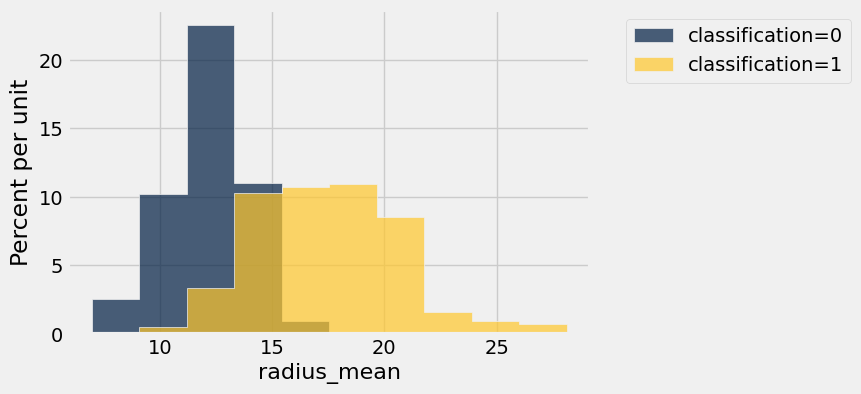

In [45]:
BC_table.hist('radius_mean', overlay= True, group = "classification")

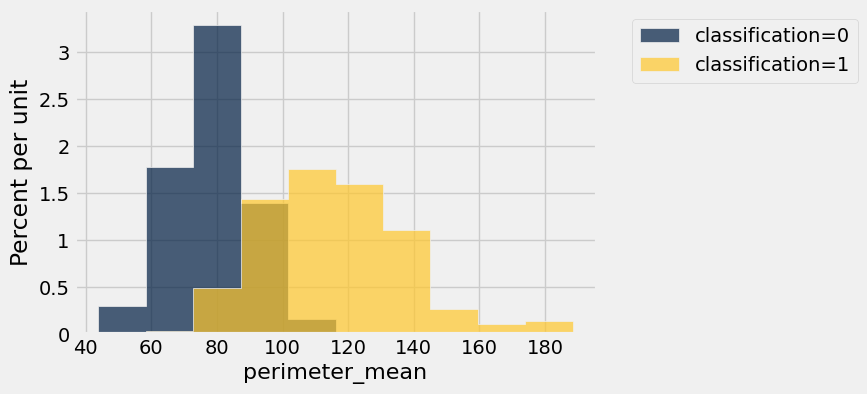

In [46]:
BC_table.hist('perimeter_mean', overlay= True, group = "classification")

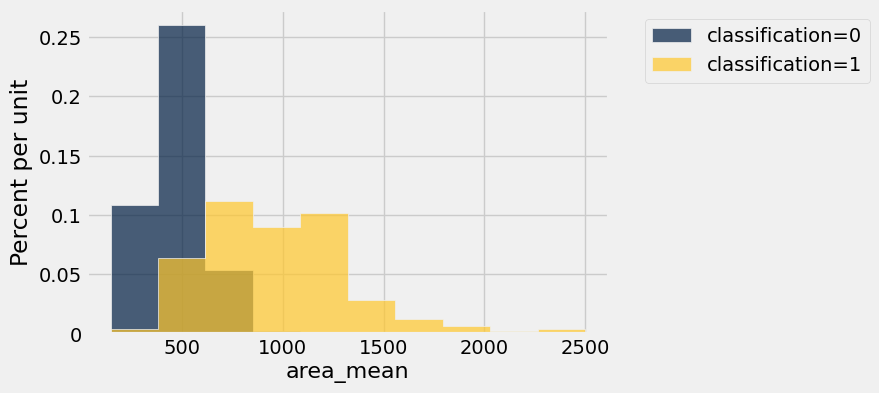

In [47]:
BC_table.hist('area_mean', overlay= True, group = "classification")

# You can also gain an overview of the conditional probability distributions for each class label by creating two tables: one for each class label.  You can then use ``hist`` of Table to show the histogram of each feature.

In [48]:
BC_table_neg = BC_table.where("classification", 0)

In [49]:
BC_table_pos = BC_table.where("classification", 1)

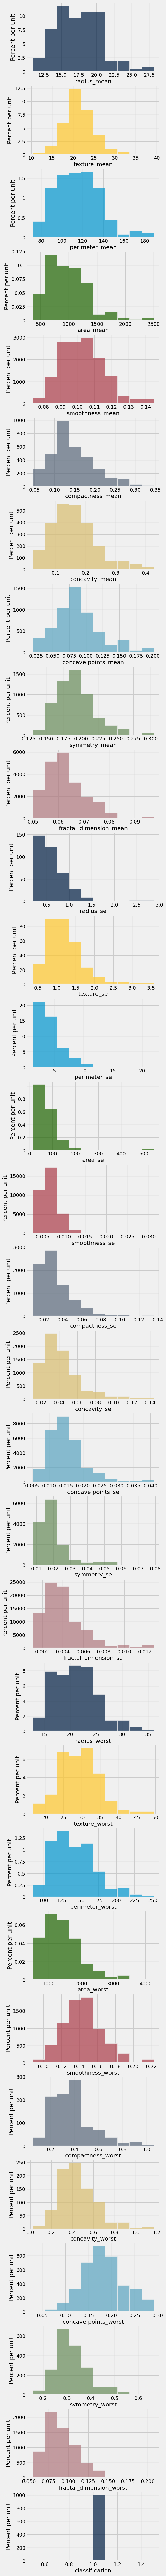

In [50]:
BC_table_pos.hist(overlay= False)

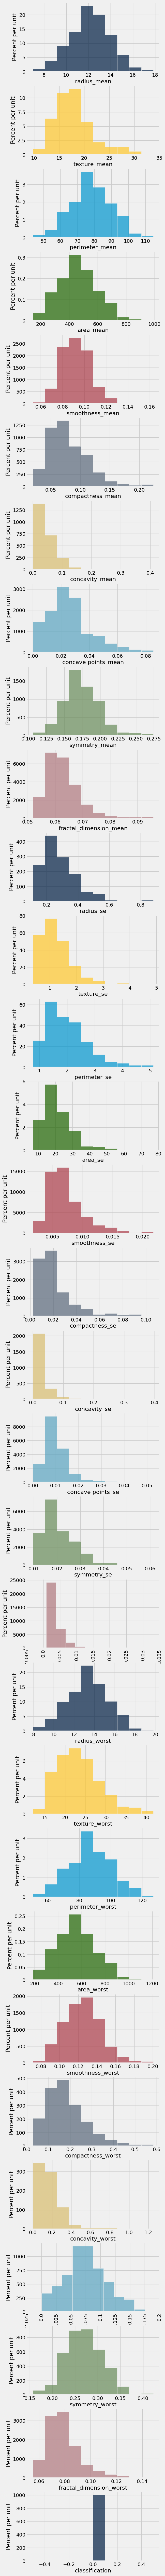

In [51]:
BC_table_neg.hist(overlay=False)